# Regression 


#### Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
# generating random data whch has lienar realtionship
np.random.seed(0)

area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20, 50, size =len(area))

data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area', 'price'])

In [5]:
data

,area,price
0,29.410131,760.253272
1,26.000393,679.009826
2,27.446845,738.171124
3,30.602233,817.055825
4,29.668895,791.722374
...,...,...
95,26.766433,705.160823
96,25.026250,652.656251
97,29.464676,766.616906
98,25.317280,678.932006


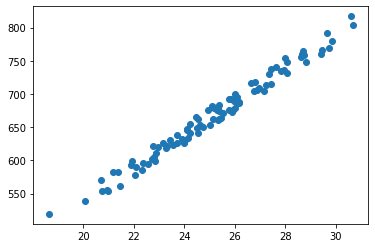

In [6]:
plt.scatter(data['area'], data['price'])

In [10]:
W  = sum(price*(area - np.mean(area))) / sum((area-np.mean(area))**2)
b = np.mean(price) - W * np.mean(area)

In [11]:
print("the regrssion coefecccients are", W, b)

the regrssion coefecccients are 24.815544052284988 43.4989785533412


In [12]:
y_pred = W * area +b

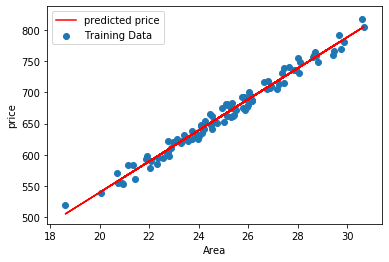

In [13]:
# grapph showing prediciton price along with data

plt.plot(area, y_pred, color='red', label="predicted price")
plt.scatter(data['area'], data['price'], label='Training Data')
plt.xlabel('Area')
plt.ylabel("price")
plt.legend()

In [14]:
# Similary we can have Multiple Linear regression
# also multivariate Linear Regression

# Predicting house price using Lienar Regression

#### we wil be suing th boston ndatasets

Before that lets look at feature_columns provided by tensorflow

The feature_colums acts as  a bridge between the input data and the model. The input paramets to be used are passed as feature columns
They are defined in tensorflow feature columns and specifies how data is interprated by the model.

There are nine availabel feature_columns:

1. categorical_column_with_identity - Each category is One hot encoded.
2. categorical_column_with_vocabulary_file: This is used when the categorical inut is string and categories are givein in the file, the string is first converted to numerical value and one hot encoded.
3. categoricla_column_with_vocabulary_list: when categories are string and categories are explicitl defined in list.
4. categorical_colum_with_hash_bucket: the number of categories is alrge and not possible to use one hot encoding.
5. crossed_columns: when we want to use tow columns combined as one featture.
6. numeric_column : when feature is numeric, can be single  vlaues or matrix.
7. indicator_column : used with categorical column
8. embedding_column: used with categorical column when   number of cateogry is large.
9. bucketized_column : used instead of specific numerica value


In [15]:
import tensorflow as tf
from tensorflow import feature_column as fc

import pandas as pd

from tensorflow.keras.datasets import boston_housing

In [22]:
(x_train, y_train),(x_test, y_test) = boston_housing.load_data()

In [23]:
boston_housing

<module 'tensorflow.keras.datasets.boston_housing' from '/home/prajin/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v2/keras/datasets/boston_housing/__init__.py'>

In [24]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
           'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [25]:
x_train_df = pd.DataFrame(x_train, columns=features)
x_test_df = pd.DataFrame(x_test, columns=features)
y_train_df = pd.DataFrame(y_train, columns=['MEDV'])
y_test_df = pd.DataFrame(y_test, columns=['MEDV'])

In [26]:
x_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


In [28]:
feature_columns =[]

for feature_name in features:
    feature_columns.append(fc.numeric_column(feature_name, dtype =tf.float32))

In [29]:
# we will creat  a input function for the estimator. the fucntion rerurns the td.Data.Dataset obejct 

In [33]:
def  estimator_input_fn(df_data, df_label, epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(df_data), df_label))
        if shuffle:
            ds = ds.shuffle(100)
        ds = ds.batch(batch_size).repeat(epochs)
        
        return ds
    return input_function

In [34]:
train_input_fn = estimator_input_fn(x_train_df, y_train_df)
val_input_fn = estimator_input_fn(x_test_df, y_test, epochs=1, shuffle=False)

In [35]:
linear_est = tf.estimator.LinearRegressor(feature_columns=feature_columns)
linear_est.train(train_input_fn, steps=100)
result = linear_est.evaluate(val_input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpgxcvtwpr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0df5eadd10>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to ru

In [36]:
# making predcitions

In [38]:
result = linear_est.predict(val_input_fn)

for pred,exp in zip(result, y_test[:32]):
    print("predicted value: ", pred['predictions'][0], "Expected:", exp)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgxcvtwpr/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
predicted value:  3.0470555 Expected: 7.2
predicted value:  23.588026 Expected: 18.8
predicted value:  21.986893 Expected: 19.0
predicted value:  23.883366 Expected: 27.0
predicted value:  22.642712 Expected: 22.2
predicted value:  21.82288 

In [39]:
# Now you yourself can try  using Logistic regression in some other simple datasets.